In [1]:
import os
import numpy as np
import sys
sys.path.append('../')

from GA.geneticAlgorithm import TwoLevelGA
# os.environ["CUDA_VISIBLE_DEVICES"]="0"


In [2]:
dataset = 'cifar10'
a = {}
print(a.values())

dict_values([])


In [3]:
#experiments_folder = '../../exp_cifar10_time'
experiments_folder = '../../exp_cifar10_time_catv3'

def print_results(experiments_folder, p_val=True, p_test=True, p_winner=True, data='cifar10'):
    generational = None
    gen = None
    for dataset in ['MB', 'MBI', 'MRB', 'MRD', 'MRDBI', 'cifar10', 'fashion_mnist']:
        try:
            print("\n\n  ------  FOLDERNAME:", experiments_folder, "------\n")
            print(dataset)
            exp_folder = os.path.join(experiments_folder, dataset)
            folder = os.path.join(exp_folder, 'genetic')

            if os.path.isdir(exp_folder):
                print("Exists")
            generational = TwoLevelGA.load_genetic_algorithm(folder=folder)
            if data == dataset:
                gen = generational
            print("Evolved til generation", generational.generation)
            if p_winner:
                winner = generational.best_individual['winner']
                print("Winner:\n", winner)
            if p_val:
                fit = generational.best_individual['best_fit']
                print("Val accuracy: ",1 - fit)
                winner = generational.best_individual['winner']
                level1_fit = generational.history_fitness[winner.__repr__()]
                print("Val accuracy first level: ",1 - level1_fit)
                level2_fit = generational.history_precision_fitness[winner.__repr__()]
                
                
                print("Val accuracy second level: ",1 - level2_fit)
            if p_test:
                test = generational.best_individual["test"]
                print("Test accuracy:", 1 - test)
        except:
            pass
    return gen

In [4]:
experiments_folder = '../../exp_mnist_grow_v2'
g = print_results(experiments_folder, p_winner=True)




  ------  FOLDERNAME: ../../exp_mnist_grow_v2 ------

MB
Exists
Loading file ../../exp_mnist_grow_v2/MB/genetic/0_2020-01-24-15:48/GA_experiment


Using TensorFlow backend.


Evolved til generation 31
Winner:
 ||CNN|F:0.8|K:3|A:relu|D:0.15||woCAT||1||
||Identity||woCAT||01||
||CNN|F:0.3|K:3|A:elu|D:0.40||woCAT||001||
||CNN|F:1.0|K:5|A:relu|D:0.35||CAT||0011||
||CNN|F:0.3|K:5|A:elu|D:0.35||CAT||10001||
HP->|GR:3.20|CELL:1|BLOCK:2|STEM:45|LR:0.0116|WU:0.3

Val accuracy:  0.9975
Val accuracy first level:  0.995833
Val accuracy second level:  0.9975
Test accuracy: 0.99424


  ------  FOLDERNAME: ../../exp_mnist_grow_v2 ------

MBI
Exists
Loading file ../../exp_mnist_grow_v2/MBI/genetic/0_2020-01-25-04:25/GA_experiment
Evolved til generation 27
Winner:
 ||CNN|F:0.9|K:3|A:elu|D:0.50||woCAT||1||
||Identity||woCAT||10||
||CNN|F:0.3|K:1|A:relu|D:0.35||SUM||111||
||CNN|F:0.8|K:3|A:relu|D:0.15||SUM||0101||
HP->|GR:3.17|CELL:2|BLOCK:2|STEM:45|LR:0.0105|WU:0.2

Val accuracy:  0.990417
Val accuracy first level:  0.987917
Val accuracy second level:  0.990417
Test accuracy: 0.9869


  ------  FOLDERNAME: ../../exp_mnist_grow_v2 ------

MRB
Exists
Loading file ../../exp_mni

In [3]:
        

experiments_folder = '../../exp_cifar10_time'
#experiments_folder = '../../exp_cifar10_grow_timefit'
#experiments_folder = '../../exp_mnist_grow_v2'
g = print_results(experiments_folder)
c = g.best_individual['winner']
print(c)
print(type(c))
m  = c.decode((32,32,3), num_classes=10, verb=True)



  ------  FOLDERNAME: ../../exp_cifar10_time ------

Loading file ../../exp_cifar10_time/cifar10/genetic/0_2019-12-13-16:28/GA_experiment


Using TensorFlow backend.


Evolved til generation 18
Val accuracy:  0.940128
Test accuracy: 0.9489
1578088574.5496364
||CNN|F:0.9|K:5|A:elu|D:0.50||woCAT||1||
||Identity||woCAT||10||
||CNN|F:0.9|K:3|A:relu|D:0.20||CAT||111||
||CNN|F:0.8|K:5|A:elu|D:0.10||woCAT||0001||
||CNN|F:0.7|K:1|A:prelu|D:0.10||CAT||10001||

<class 'utils.codification_ops.ChromosomeOp'>
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 45)   1260        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 40)   45

In [ ]:
exps = ['../../' + exp for exp in os.listdir('../../') if 'exp' in exp]
for exp in exps:
    print_results(exp, p_winner=True)

In [21]:
from utils.codification_grew import FitnessGrow
from utils.datamanager import DataManager

experiments_folder = '../../exp_cifar10_time'
experiments_folder = '../../exp_mnist_grow_v2'
#experiments_folder = '../../exp_finals_v2'

dataset = 'MRDBI'
generational = print_results(experiments_folder, data=dataset)

def test_data_augmentation(dataset='MRB', folders = []):
    print("Data:", dataset)
    scores = {}
    
    # Load data
    classes=[]
    num_clases = 100 if dataset == 'cifar100' else 10
    dm = DataManager(dataset, clases=classes, folder_var_mnist='../../datasets/MNIST_variations',
                     num_clases=num_clases) #, max_examples=8000)
    data = dm.load_data()
            
    for experiments_folder in folders:
        scores[experiments_folder] = {}
        print("Folder:", experiments_folder)
        exp_folder = os.path.join(experiments_folder, dataset)
        folder = os.path.join(exp_folder, 'genetic')
        generational = TwoLevelGA.load_genetic_algorithm(folder=folder)
        
        winner = generational.best_individual['winner']
        fit = generational.best_individual['best_fit']
        test = generational.best_individual["test"]
        print(winner)
        print(1 - fit)
        print(1 - test, test)
        
        for aug in [False]:
            s = "WITH" if aug else "WITHOUT"
            s += " Data-augmentation"
            print(s)
            fitness_cnn = FitnessGrow()    
            if aug:
                test_eps = 200
                augment = 'cutout'
            else:
                test_eps = 100
                augment = False #'cutout'

            
            fitness_cnn.set_params(data=data, verbose=True, batch_size=128, reduce_plateau=False,
                           epochs=15, cosine_decay=False, early_stop=0, 
                           warm_epochs=0, base_lr=0.05, smooth_label=0.1, find_lr=False,
                           precise_epochs=75, include_time=True, test_eps=test_eps, augment=augment)

            score = fitness_cnn.calc(winner, test=True, precise_mode=True)
            scores[experiments_folder][aug] = score
    return scores





  ------  FOLDERNAME: ../../exp_mnist_grow_v2 ------

MB
Exists
Loading file ../../exp_mnist_grow_v2/MB/genetic/0_2020-01-24-15:48/GA_experiment
Evolved til generation 31
Winner:
 ||CNN|F:0.8|K:3|A:relu|D:0.15||woCAT||1||
||Identity||woCAT||01||
||CNN|F:0.3|K:3|A:elu|D:0.40||woCAT||001||
||CNN|F:1.0|K:5|A:relu|D:0.35||CAT||0011||
||CNN|F:0.3|K:5|A:elu|D:0.35||CAT||10001||
HP->|GR:3.20|CELL:1|BLOCK:2|STEM:45|LR:0.0116|WU:0.3

Val accuracy:  0.9975
Val accuracy first level:  0.995833
Val accuracy second level:  0.9975
Test accuracy: 0.99424


  ------  FOLDERNAME: ../../exp_mnist_grow_v2 ------

MBI
Exists
Loading file ../../exp_mnist_grow_v2/MBI/genetic/0_2020-01-25-04:25/GA_experiment
Evolved til generation 27
Winner:
 ||CNN|F:0.9|K:3|A:elu|D:0.50||woCAT||1||
||Identity||woCAT||10||
||CNN|F:0.3|K:1|A:relu|D:0.35||SUM||111||
||CNN|F:0.8|K:3|A:relu|D:0.15||SUM||0101||
HP->|GR:3.17|CELL:2|BLOCK:2|STEM:45|LR:0.0105|WU:0.2

Val accuracy:  0.990417
Val accuracy first level:  0.987917
Val a

In [22]:
generational.best_individual


{'winner': ||CNN|F:0.8|K:3|A:relu|D:0.05||woCAT||1||
 ||Identity||woCAT||01||
 ||CNN|F:0.6|K:5|A:relu|D:0.20||woCAT||001||
 ||CNN|F:0.8|K:5|A:relu|D:0.20||woCAT||0001||
 HP->|GR:2.42|CELL:2|BLOCK:2|STEM:45|LR:0.0107|WU:0.1,
 'best_fit': 0.068333,
 'test': 0.06806}

{'winner': ||CNN|F:0.8|K:3|A:relu|D:0.05||woCAT||1||
||Identity||woCAT||01||
||CNN|F:0.6|K:5|A:relu|D:0.20||woCAT||001||
||CNN|F:0.8|K:5|A:relu|D:0.20||woCAT||0001||
HP->|GR:2.42|CELL:2|BLOCK:2|STEM:45|LR:0.0107|WU:0.1
, 'best_fit': 0.068333, 'test': 0.06806}

Training:
 ||CNN|F:0.8|K:3|A:relu|D:0.05||woCAT||1||
||Identity||woCAT||01||
||CNN|F:0.6|K:5|A:relu|D:0.20||woCAT||001||
||CNN|F:0.8|K:5|A:relu|D:0.20||woCAT||0001||
HP->|GR:2.42|CELL:2|BLOCK:2|STEM:45|LR:0.0107|WU:0.1

(9600, 28, 28, 1) train samples
(2400, 28, 28, 1) validation samples
(50000, 28, 28, 1) test samples
Training... Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 45)        450       
___________________________________________________________

Epoch 13/100
12000/12000 [==============================] - 8s 693us/step - loss: 0.7519 - accuracy: 0.9167 - val_loss: 0.5190 - val_accuracy: 0.8510
Epoch 14/100
12000/12000 [==============================] - 9s 717us/step - loss: 0.7374 - accuracy: 0.9212 - val_loss: 0.8002 - val_accuracy: 0.7727
Epoch 15/100
12000/12000 [==============================] - 8s 694us/step - loss: 0.7294 - accuracy: 0.9268 - val_loss: 0.6195 - val_accuracy: 0.8277
Epoch 16/100
12000/12000 [==============================] - 8s 698us/step - loss: 0.6900 - accuracy: 0.9404 - val_loss: 0.4651 - val_accuracy: 0.8667
Epoch 17/100
12000/12000 [==============================] - 8s 692us/step - loss: 0.6619 - accuracy: 0.9533 - val_loss: 0.5448 - val_accuracy: 0.8627
Epoch 18/100
12000/12000 [==============================] - 8s 696us/step - loss: 0.6535 - accuracy: 0.9574 - val_loss: 0.5108 - val_accuracy: 0.8700
Epoch 19/100
12000/12000 [==============================] - 8s 693us/step - loss: 0.6416 - accuracy:

12000/12000 [==============================] - 8s 679us/step - loss: 0.5103 - accuracy: 0.9998 - val_loss: 0.3187 - val_accuracy: 0.9217
Epoch 68/100
12000/12000 [==============================] - 8s 682us/step - loss: 0.5127 - accuracy: 0.9996 - val_loss: 0.4436 - val_accuracy: 0.8887
Epoch 69/100
12000/12000 [==============================] - 8s 680us/step - loss: 0.5097 - accuracy: 0.9999 - val_loss: 0.3173 - val_accuracy: 0.9217
Epoch 70/100
12000/12000 [==============================] - 8s 684us/step - loss: 0.5087 - accuracy: 1.0000 - val_loss: 0.3325 - val_accuracy: 0.9187
Epoch 71/100
12000/12000 [==============================] - 8s 681us/step - loss: 0.5126 - accuracy: 0.9991 - val_loss: 0.3977 - val_accuracy: 0.9017
Epoch 72/100
12000/12000 [==============================] - 8s 681us/step - loss: 0.5171 - accuracy: 0.9981 - val_loss: 0.3558 - val_accuracy: 0.9123
Epoch 73/100
12000/12000 [==============================] - 8s 678us/step - loss: 0.5155 - accuracy: 0.9987 - val

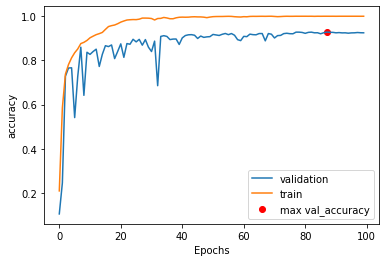

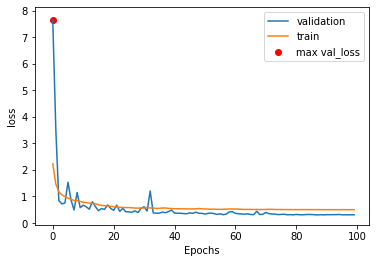

0.0686 in 14.6 min



In [26]:
from utils.codification_grew import FitnessGrow
from utils.datamanager import DataManager

# Fitness params
epochs = 15
batch_size = 64
verbose = True
redu_plat = False
early_stop = 0
warm_up_epochs = 0
base_lr = 0.05
smooth = 0.1
cosine_dec = False
lr_find = False
precise_eps = 75
include_time = True
test_eps = 100
augment = False

winner = generational.best_individual['winner']
print(generational.best_individual)
print("\nTraining:\n", winner)

num_clases = 100 if dataset == 'cifar100' else 10
dm = DataManager(dataset, clases=[], folder_var_mnist='../../datasets/MNIST_variations', num_clases=num_clases) #, max_examples=8000)
data = dm.load_data()
fitness_cnn = FitnessGrow()
fitness_cnn.set_params(data=data, verbose=verbose, batch_size=batch_size, reduce_plateau=redu_plat,
               epochs=epochs, cosine_decay=cosine_dec, early_stop=early_stop, 
               warm_epochs=warm_up_epochs, base_lr=base_lr, smooth_label=smooth, find_lr=lr_find,
               precise_epochs=precise_eps, include_time=include_time, test_eps=test_eps, augment=augment)

score = fitness_cnn.calc(winner, test=True)

Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 45)   450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 45)   180         conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 28, 28, 45)   0           batch_normalization_1[0][0]      
________________________________________________________________________________

234/234 [==============================] - 34s 143ms/step - loss: 0.9038 - accuracy: 0.8324 - val_loss: 0.5613 - val_accuracy: 0.8157
Epoch 5/100
234/234 [==============================] - 34s 144ms/step - loss: 0.8681 - accuracy: 0.8499 - val_loss: 0.3342 - val_accuracy: 0.8980
Epoch 6/100
234/234 [==============================] - 34s 146ms/step - loss: 0.8368 - accuracy: 0.8641 - val_loss: 0.3257 - val_accuracy: 0.8990
Epoch 7/100
234/234 [==============================] - 35s 148ms/step - loss: 0.8065 - accuracy: 0.8788 - val_loss: 0.2741 - val_accuracy: 0.9157
Epoch 8/100
234/234 [==============================] - 35s 150ms/step - loss: 0.7870 - accuracy: 0.8859 - val_loss: 0.2896 - val_accuracy: 0.9147
Epoch 9/100
234/234 [==============================] - 33s 140ms/step - loss: 0.7680 - accuracy: 0.8933 - val_loss: 0.2667 - val_accuracy: 0.9190
Epoch 10/100
234/234 [==============================] - 33s 140ms/step - loss: 0.7539 - accuracy: 0.8985 - val_loss: 0.2598 - val_accura

Epoch 60/100
234/234 [==============================] - 34s 146ms/step - loss: 0.5937 - accuracy: 0.9703 - val_loss: 0.1940 - val_accuracy: 0.9523
Epoch 61/100
234/234 [==============================] - 35s 149ms/step - loss: 0.5960 - accuracy: 0.9693 - val_loss: 0.1983 - val_accuracy: 0.9553
Epoch 62/100
234/234 [==============================] - 34s 146ms/step - loss: 0.5920 - accuracy: 0.9704 - val_loss: 0.1995 - val_accuracy: 0.9557
Epoch 63/100
234/234 [==============================] - 35s 149ms/step - loss: 0.5930 - accuracy: 0.9706 - val_loss: 0.2047 - val_accuracy: 0.9527
Epoch 64/100
234/234 [==============================] - 35s 148ms/step - loss: 0.5900 - accuracy: 0.9713 - val_loss: 0.2123 - val_accuracy: 0.9520
Epoch 65/100
234/234 [==============================] - 34s 146ms/step - loss: 0.5888 - accuracy: 0.9727 - val_loss: 0.2077 - val_accuracy: 0.9470
Epoch 66/100
234/234 [==============================] - 34s 145ms/step - loss: 0.5890 - accuracy: 0.9718 - val_loss: 0

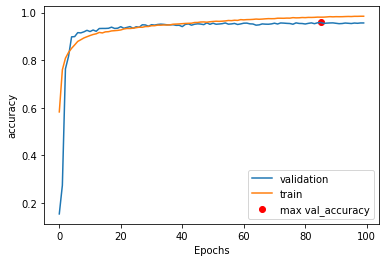

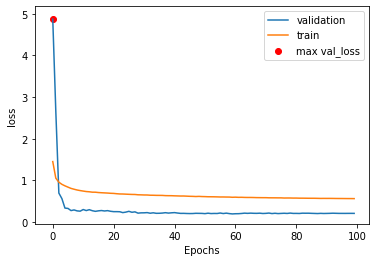

0.0413 in 56.9 min



In [19]:

augment = 'cutout'
fitness_cnn.set_params(data=data, verbose=verbose, batch_size=batch_size, reduce_plateau=redu_plat,
               epochs=epochs, cosine_decay=cosine_dec, early_stop=early_stop, 
               warm_epochs=warm_up_epochs, base_lr=base_lr, smooth_label=smooth, find_lr=lr_find,
               precise_epochs=precise_eps, include_time=include_time, test_eps=test_eps, augment=augment)

score = fitness_cnn.calc(winner, test=True)

In [11]:
augment = 'cutout'
test_eps = 200
fitness_cnn.set_params(data=data, verbose=verbose, batch_size=batch_size, reduce_plateau=redu_plat,
               epochs=epochs, cosine_decay=cosine_dec, early_stop=early_stop, 
               warm_epochs=warm_up_epochs, base_lr=base_lr, smooth_label=smooth, find_lr=lr_find,
               precise_epochs=precise_eps, include_time=include_time, test_eps=test_eps, augment=augment)

score = fitness_cnn.calc(g, test=True)

Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 45)   450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 45)   180         conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 28, 28, 45)   0           batch_normalization_1[0][0]      
________________________________________________________________________________

Epoch 1/200
234/234 [==============================] - 36s 156ms/step - loss: 1.4543 - accuracy: 0.5866 - val_loss: 6.3795 - val_accuracy: 0.1063
Epoch 2/200
234/234 [==============================] - 34s 145ms/step - loss: 1.0481 - accuracy: 0.7637 - val_loss: 3.4027 - val_accuracy: 0.1720
Epoch 3/200
234/234 [==============================] - 35s 148ms/step - loss: 0.9454 - accuracy: 0.8120 - val_loss: 0.5954 - val_accuracy: 0.7980
Epoch 4/200
234/234 [==============================] - 36s 152ms/step - loss: 0.9004 - accuracy: 0.8344 - val_loss: 0.3857 - val_accuracy: 0.8767
Epoch 5/200
234/234 [==============================] - 36s 152ms/step - loss: 0.8548 - accuracy: 0.8565 - val_loss: 0.3113 - val_accuracy: 0.8990
Epoch 6/200
234/234 [==============================] - 35s 151ms/step - loss: 0.8344 - accuracy: 0.8673 - val_loss: 0.3061 - val_accuracy: 0.9137
Epoch 7/200
234/234 [==============================] - 36s 152ms/step - loss: 0.8080 - accuracy: 0.8779 - val_loss: 0.3199 -

KeyboardInterrupt: 

In [17]:
print(generational.best_individual)
winner = generational.best_individual['winner']
print()
print(winner)
print(generational.history_fitness[winner.__repr__()])
print()
for g in generational.population_1:
    print(generational.history_fitness[g.__repr__()])
    break
print(g)

{'winner': ||CNN|F:1.1|K:3|A:elu|D:0.25||woCAT||1||
||CNN|F:0.6|K:3|A:prelu|D:0.25||woCAT||01||
||CNN|F:0.6|K:1|A:prelu|D:0.25||woCAT||100||
||CNN|F:0.6|K:5|A:relu|D:0.35||CAT||0011||
HP->|GR:3.45|CELL:1|BLOCK:2|STEM:45|LR:0.0026|WU:0.2
, 'best_fit': 0.054827, 'test': 0.0505}

||CNN|F:1.1|K:3|A:elu|D:0.25||woCAT||1||
||CNN|F:0.6|K:3|A:prelu|D:0.25||woCAT||01||
||CNN|F:0.6|K:1|A:prelu|D:0.25||woCAT||100||
||CNN|F:0.6|K:5|A:relu|D:0.35||CAT||0011||
HP->|GR:3.45|CELL:1|BLOCK:2|STEM:45|LR:0.0026|WU:0.2

0.05529

0.055206
||CNN|F:1.0|K:3|A:elu|D:0.25||woCAT||1||
||CNN|F:0.7|K:1|A:relu|D:0.30||SUM||11||
||CNN|F:0.7|K:5|A:relu|D:0.30||CAT||101||
HP->|GR:3.31|CELL:1|BLOCK:2|STEM:45|LR:0.0056|WU:0.2



In [20]:
folders = ['../../exp_finals', '../../exp_mnist_grow_v2']
dataset = 'MRDBI' 
scores = test_data_augmentation(dataset, folders)
for k,v in scores.items():
    print(k)
    for k2, v2 in v.items():
        print("\t", k2, ":", v2)

Data: MRDBI


KeyboardInterrupt: 

Data: MRB
(9600, 28, 28, 1) train samples
(2400, 28, 28, 1) validation samples
(50000, 28, 28, 1) test samples
Folder: ../../exp_finals
Loading file ../../exp_finals/MRB/genetic/0_2020-02-26-12:09/GA_experiment
||Identity||woCAT||1||
||Identity||woCAT||01||
||CNN|F:0.7|K:3|A:prelu|D:0.30||SUM||101||
||CNN|F:0.5|K:5|A:prelu|D:0.15||SUM||0011||
||Identity||woCAT||00001||
HP->|GR:3.60|CELL:2|BLOCK:2|STEM:45|LR:0.0403|WU:0.3

0.979225
0.84792 0.15208
WITH Data-augmentation
Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 45)   450         input_1[0][0]                    
__

Epoch 1/100
93/93 [==============================] - 41s 446ms/step - loss: 1.8524 - accuracy: 0.4050 - val_loss: 2.3601 - val_accuracy: 0.1180
Epoch 2/100
93/93 [==============================] - 36s 384ms/step - loss: 1.2029 - accuracy: 0.7230 - val_loss: 2.3170 - val_accuracy: 0.1141
Epoch 3/100
93/93 [==============================] - 36s 388ms/step - loss: 1.0019 - accuracy: 0.8100 - val_loss: 2.4032 - val_accuracy: 0.1147
Epoch 4/100
93/93 [==============================] - 36s 389ms/step - loss: 0.9087 - accuracy: 0.8502 - val_loss: 1.0272 - val_accuracy: 0.6764
Epoch 5/100
93/93 [==============================] - 36s 390ms/step - loss: 0.8554 - accuracy: 0.8692 - val_loss: 0.5014 - val_accuracy: 0.9131
Epoch 6/100
93/93 [==============================] - 36s 389ms/step - loss: 0.8237 - accuracy: 0.8834 - val_loss: 0.7857 - val_accuracy: 0.8737
Epoch 7/100
93/93 [==============================] - 36s 389ms/step - loss: 0.8119 - accuracy: 0.8876 - val_loss: 1.6649 - val_accuracy:

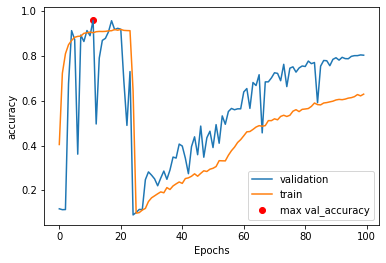

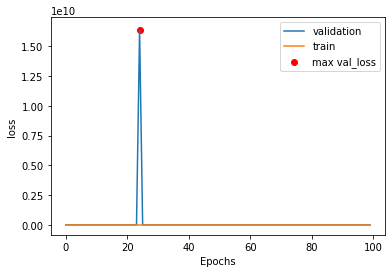

0.1965 in 61.8 min

WITHOUT Data-augmentation
Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 45)   450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 45)   180         conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 28, 28, 45)   180         conv2d_1[0][0]                   
__________________________________

Epoch 1/100
93/93 [==============================] - 42s 447ms/step - loss: 1.8430 - accuracy: 0.4040 - val_loss: 1.8829 - val_accuracy: 0.2968
Epoch 2/100
93/93 [==============================] - 36s 387ms/step - loss: 1.2052 - accuracy: 0.7209 - val_loss: 4.4777 - val_accuracy: 0.2557
Epoch 3/100
93/93 [==============================] - 36s 388ms/step - loss: 1.0100 - accuracy: 0.8105 - val_loss: 1.0697 - val_accuracy: 0.6582
Epoch 4/100
93/93 [==============================] - 36s 388ms/step - loss: 0.8951 - accuracy: 0.8569 - val_loss: 0.4815 - val_accuracy: 0.8975
Epoch 5/100
93/93 [==============================] - 36s 388ms/step - loss: 0.8560 - accuracy: 0.8703 - val_loss: 0.4389 - val_accuracy: 0.9277
Epoch 6/100
93/93 [==============================] - 36s 387ms/step - loss: 0.8427 - accuracy: 0.8769 - val_loss: 0.4409 - val_accuracy: 0.9297
Epoch 7/100
93/93 [==============================] - 36s 388ms/step - loss: 0.8113 - accuracy: 0.8851 - val_loss: 0.5566 - val_accuracy:

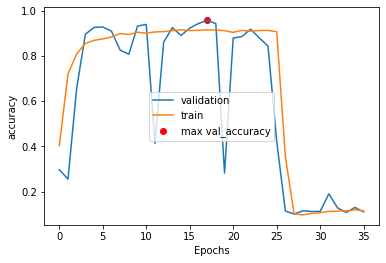

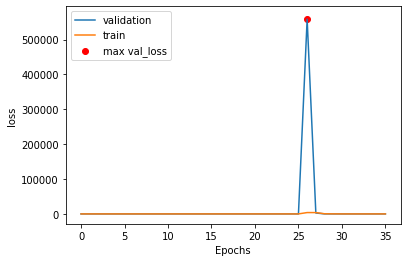

0.8897 in 23.0 min

Folder: ../../exp_mnist_grow_v2
Loading file ../../exp_mnist_grow_v2/MRB/genetic/0_2020-01-25-17:34/GA_experiment
||CNN|F:1.0|K:3|A:elu|D:0.20||woCAT||1||
||CNN|F:0.5|K:5|A:relu|D:0.40||woCAT||01||
||Identity||CAT||101||
HP->|GR:3.87|CELL:2|BLOCK:2|STEM:45|LR:0.0277|WU:0.3

0.990833
0.98696 0.01304
WITH Data-augmentation
Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 45)   450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (N

93/93 [==============================] - 17s 184ms/step - loss: 0.7267 - accuracy: 0.9257 - val_loss: 0.1538 - val_accuracy: 0.9684
Epoch 60/100
93/93 [==============================] - 17s 185ms/step - loss: 0.7202 - accuracy: 0.9261 - val_loss: 0.1699 - val_accuracy: 0.9725
Epoch 61/100
93/93 [==============================] - 17s 184ms/step - loss: 0.7110 - accuracy: 0.9280 - val_loss: 0.2141 - val_accuracy: 0.9637
Epoch 62/100
93/93 [==============================] - 17s 185ms/step - loss: 0.7241 - accuracy: 0.9268 - val_loss: 0.1537 - val_accuracy: 0.9683
Epoch 63/100
93/93 [==============================] - 17s 185ms/step - loss: 0.7183 - accuracy: 0.9241 - val_loss: 0.2138 - val_accuracy: 0.9598
Epoch 64/100
93/93 [==============================] - 17s 184ms/step - loss: 0.7133 - accuracy: 0.9306 - val_loss: 0.1697 - val_accuracy: 0.9665
Epoch 65/100
93/93 [==============================] - 17s 185ms/step - loss: 0.7223 - accuracy: 0.9230 - val_loss: 0.1518 - val_accuracy: 0.969

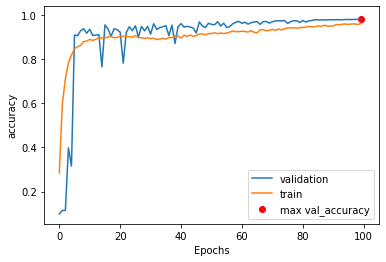

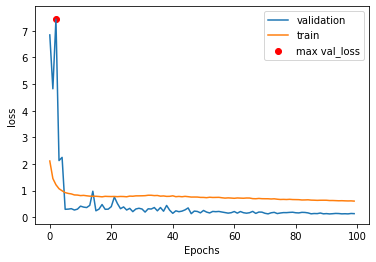

0.0176 in 29.6 min

WITHOUT Data-augmentation
Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 45)   450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 45)   180         conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 28, 28, 45)   0           batch_normalization_1[0][0]      
__________________________________

93/93 [==============================] - 17s 185ms/step - loss: 0.7218 - accuracy: 0.9239 - val_loss: 0.1756 - val_accuracy: 0.9680
Epoch 62/100
93/93 [==============================] - 17s 184ms/step - loss: 0.7267 - accuracy: 0.9209 - val_loss: 0.1735 - val_accuracy: 0.9665
Epoch 63/100
93/93 [==============================] - 17s 184ms/step - loss: 0.7022 - accuracy: 0.9312 - val_loss: 0.3073 - val_accuracy: 0.9226
Epoch 64/100
93/93 [==============================] - 17s 184ms/step - loss: 0.7103 - accuracy: 0.9293 - val_loss: 0.2233 - val_accuracy: 0.9558
Epoch 65/100
93/93 [==============================] - 17s 184ms/step - loss: 0.7058 - accuracy: 0.9319 - val_loss: 0.1473 - val_accuracy: 0.9705
Epoch 66/100
93/93 [==============================] - 17s 185ms/step - loss: 0.7061 - accuracy: 0.9280 - val_loss: 0.2377 - val_accuracy: 0.9591
Epoch 67/100
93/93 [==============================] - 17s 185ms/step - loss: 0.7036 - accuracy: 0.9331 - val_loss: 0.1587 - val_accuracy: 0.964

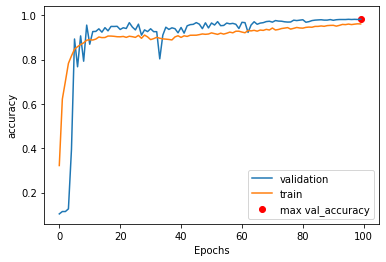

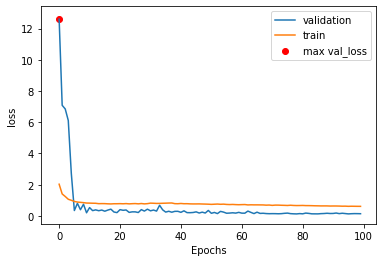

0.0179 in 29.3 min

../../exp_finals
	 True : 0.1965399980545044
	 False : 0.8897399976849556
../../exp_mnist_grow_v2
	 True : 0.017639994621276855
	 False : 0.01792001724243164


In [39]:
folders = ['../../exp_finals', '../../exp_mnist_grow_v2']
datasets = 'MRB' 
scores = test_data_augmentation(dataset, folders
                               )
for k,v in scores.items():
    print(k)
    for k2, v2 in v.items():
        print("\t", k2, ":", v2)

In [6]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"


model = winner.decode(input_shape=(32,32,3), classes=10, verb=True)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 45)   1260        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 40)   45040       conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 32, 32, 40)   160         conv2d_2[0][0]                   
____________________________________________________________________________________________

In [34]:
from utils.codification_cnn import FitnessCNN
from utils.datamanager import DataManager


# Fitness params
epochs = 15
batch_size = 128
verbose = True
redu_plat = False
early_stop = 0
warm_up_epochs = 0
base_lr = 0.05
smooth = 0.1
cosine_dec = False
lr_find = False
precise_eps = 75
include_time = True

aug = True
fitness_cnn = FitnessGrow()    
if aug:
    test_eps = 200
    augment = 'cutout'
else:
    test_eps = 100
    augmentent = False #'cutout'

# Load data
classes=[]
num_clases = 100 if dataset == 'cifar100' else 10
dm = DataManager(dataset, clases=classes, folder_var_mnist='../../datasets/MNIST_variations',
                 num_clases=num_clases) #, max_examples=8000)
data = dm.load_data()
fitness_cnn.set_params(data=data, verbose=verbose, batch_size=batch_size, reduce_plateau=redu_plat,
               epochs=epochs, cosine_decay=cosine_dec, early_stop=early_stop, 
               warm_epochs=warm_up_epochs, base_lr=base_lr, smooth_label=smooth, find_lr=lr_find,
               precise_epochs=precise_eps, include_time=include_time, test_eps=test_eps, augment=augment)

score = fitness_cnn.calc(winner, test=True, precise_mode=True)

(9600, 28, 28, 1) train samples
(2400, 28, 28, 1) validation samples
(50000, 28, 28, 1) test samples
Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 45)   450         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 45)   180         conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 28, 28, 45)   180         conv2d_1[0][0

Epoch 1/200
93/93 [==============================] - 45s 482ms/step - loss: 1.9557 - accuracy: 0.3544 - val_loss: 6.6489 - val_accuracy: 0.1080
Epoch 2/200
93/93 [==============================] - 36s 384ms/step - loss: 1.2749 - accuracy: 0.6897 - val_loss: 1.7337 - val_accuracy: 0.3799
Epoch 3/200
93/93 [==============================] - 36s 382ms/step - loss: 1.0614 - accuracy: 0.7875 - val_loss: 2.3301 - val_accuracy: 0.3355
Epoch 4/200
93/93 [==============================] - 36s 383ms/step - loss: 0.9534 - accuracy: 0.8307 - val_loss: 1.8836 - val_accuracy: 0.4074
Epoch 5/200
93/93 [==============================] - 36s 392ms/step - loss: 0.8884 - accuracy: 0.8576 - val_loss: 0.8592 - val_accuracy: 0.7475
Epoch 6/200
93/93 [==============================] - 36s 392ms/step - loss: 0.8493 - accuracy: 0.8748 - val_loss: 0.4114 - val_accuracy: 0.9226
Epoch 7/200
93/93 [==============================] - 36s 392ms/step - loss: 0.8205 - accuracy: 0.8853 - val_loss: 0.4758 - val_accuracy:

KeyboardInterrupt: 

(9600, 28, 28, 1) train samples
(2400, 28, 28, 1) validation samples
(50000, 28, 28, 1) test samples
Training... Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 45)        450       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 45)        180       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 45)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 40)        16240     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 40)        160       
____________

12000/12000 [==============================] - 14s 1ms/step - loss: 0.5087 - accuracy: 0.9998 - val_loss: 0.3356 - val_accuracy: 0.9216
Epoch 72/100
12000/12000 [==============================] - 14s 1ms/step - loss: 0.5072 - accuracy: 1.0000 - val_loss: 0.3140 - val_accuracy: 0.9280
Epoch 73/100
12000/12000 [==============================] - 14s 1ms/step - loss: 0.5069 - accuracy: 0.9999 - val_loss: 0.3232 - val_accuracy: 0.9258
Epoch 74/100
12000/12000 [==============================] - 14s 1ms/step - loss: 0.5065 - accuracy: 0.9999 - val_loss: 0.3217 - val_accuracy: 0.9266
Epoch 75/100
12000/12000 [==============================] - 14s 1ms/step - loss: 0.5060 - accuracy: 0.9999 - val_loss: 0.3205 - val_accuracy: 0.9268
Epoch 76/100
12000/12000 [==============================] - 14s 1ms/step - loss: 0.5054 - accuracy: 1.0000 - val_loss: 0.3125 - val_accuracy: 0.9266
Epoch 77/100
12000/12000 [==============================] - 14s 1ms/step - loss: 0.5067 - accuracy: 0.9996 - val_loss: 

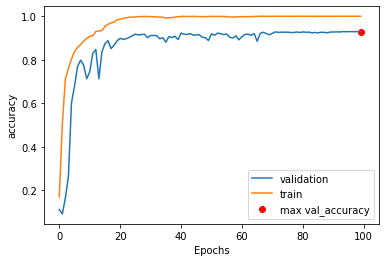

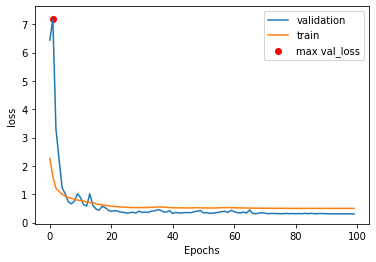

0.0704 in 24.7 min



In [11]:
from utils.codification_grew import FitnessGrow


fitness_cnn = FitnessGrow()    

# Load data
classes=[]
num_clases = 100 if dataset == 'cifar100' else 10
dm = DataManager(dataset, clases=classes, folder_var_mnist='../../datasets/MNIST_variations',
                 num_clases=num_clases) #, max_examples=8000)
data = dm.load_data()
fitness_cnn.set_params(data=data, verbose=verbose, batch_size=batch_size, reduce_plateau=redu_plat,
               epochs=epochs, cosine_decay=cosine_dec, early_stop=early_stop, 
               warm_epochs=warm_up_epochs, base_lr=base_lr, smooth_label=smooth, find_lr=lr_find,
               precise_epochs=precise_eps, include_time=include_time, test_eps=test_eps, augment=augment)

score = fitness_cnn.calc(winner, test=True, precise_mode=True)

18
(10001,)


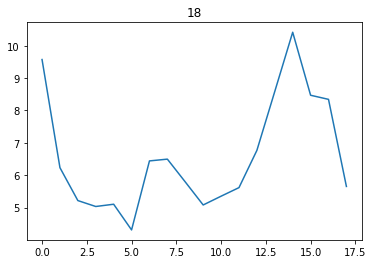

In [8]:
import matplotlib.pyplot as plt

h = generational.history
gens = np.sum(h, axis=0)

new_gens = []
for i, g in enumerate(gens):
    if g > 0.01:
        new_gens.append(g)
    else:
        break
print(i)
i = i-1
print(gens.shape)
plt.plot(new_gens)
plt.title("%d" % generational.generation)
plt.show()


In [ ]:
h2 = h[:, 0:i]
hp = generational.history_precision
hp2 = hp[:, 0:i]
print(h2.shape)
generational.history = h2
generational.history_precision = hp2
generational.show_history()

In [ ]:
generational.best_individual

In [ ]:
w = generational.best_individual['winner']
print(generational.history_fitness[w.__repr__()])
print(generational.history_precision_fitness[w.__repr__()])

In [ ]:
w

In [ ]:
w2 = '||CNN|F:0.6|K:3|A:relu|D:0.15||woCAT||1||\n\
||CNN|F:0.9|K:1|A:relu|D:0.15||woCAT||10||\n\
||CNN|F:0.8|K:3|A:prelu|D:0.30||CAT||111||\n\
||CNN|F:1.1|K:3|A:relu|D:0.10||CAT||0011||\n\
HP->|GR:2.79|CELL:2|BLOCK:3|STEM:32\n'
w = generational.best_individual['winner']
print(generational.history_fitness[w2])
print(generational.history_precision_fitness[w2])

In [ ]:
 import keras
keras.backend.clear_session()
experiments_folder = '../../exp_cifar10_grow_timefit'

generational = print_results(experiments_folder)

winner = generational.best_individual['winner']
fit = generational.best_individual['best_fit']
test = generational.best_individual["test"]
print(winner)
print(1 - fit)
print(1 - test, test)
winner
winner.hparams.stem = 45

model = winner.decode(input_shape=(32,32,3), classes=10, verb=True)


In [ ]:
score = fitness_cnn.calc(winner, test=True, precise_mode=True)

In [ ]:
winner.hparams.stem = 45
if hasattr(winner, 'hparams'):
    print(winner.hparams.__repr__())
    print(winner.hparams.stem)

In [ ]:
0.6*72

In [ ]:
1719/0.8/128


In [ ]:
2.57**3

In [ ]:
keras

In [ ]:
from keras.models import Model
from keras.layers import Input, DepthwiseConv2D, Conv2D


inp = Input(shape=(32,32,3))
x = Conv2D(128, 3, padding='same', activation='relu')(inp)
x = DepthwiseConv2D(3, padding='same', activation='relu', depth_multiplier=2, use_bias=False)(x)

model = Model(inp, x)
model.summary()

In [ ]:
from utils.codification_ops import ChromosomeOp
print(winner)

In [ ]:
print(winner)

In [4]:
# from utils.codification_ops import OperationBlock, ChromosomeOp, CNN, Identity, Sum, Inputs, MaxPooling, Concatenation
from utils.codification_grew import OperationBlock, ChromosomeGrow, CNNGrow, IdentityGrow, Sum, Concatenation, Inputs, MaxPooling

def cat():
    return Concatenation()

def suma():
    return Sum()

def iden():
    return IdentityGrow()

def maxp():
    return MaxPooling()

def res_cnn(fm): 
    # filter mul = 1.12 makes the net double the number of filters every 6 convolutions.
    # That's because ResNet20 has 3 cells per block, and 2 convs on each cell. Therefore, it has 6 convs
    # block.
    return CNNGrow(filter_mul=fm, kernel_size=3, activation='relu', dropout=0.)

def get_res_ops(fm=1.12):
    return [iden(), res_cnn(fm), maxp()]

def get_cnn_op(F, K, A, D, grow=True):
    if grow:
        cnn = CNNGrow(filter_mul=F, kernel_size=K, activation=A, dropout=D)
    else:
        cnn = CNN(filter_mul=F, kernel_size=K, activation=A, dropout=D)
    ops = [iden(), cnn] if grow else [iden(), cnn, maxp()]
    return ops

experiments_folder = '../../exp_cifar10_time'
experiments_folder = '../../exp_mnist_grow_v2'
generational = print_results(experiments_folder, data='MB')
winner = generational.best_individual['winner']

print("\nOriginal")
print(winner)

Using TensorFlow backend.




  ------  FOLDERNAME: ../../exp_mnist_grow_v2 ------

MB
Exists
Loading file ../../exp_mnist_grow_v2/MB/genetic/0_2020-01-24-15:48/GA_experiment
Evolved til generation 31
Winner:
 ||CNN|F:0.8|K:3|A:relu|D:0.15||woCAT||1||
||Identity||woCAT||01||
||CNN|F:0.3|K:3|A:elu|D:0.40||woCAT||001||
||CNN|F:1.0|K:5|A:relu|D:0.35||CAT||0011||
||CNN|F:0.3|K:5|A:elu|D:0.35||CAT||10001||
HP->|GR:3.20|CELL:1|BLOCK:2|STEM:45|LR:0.0116|WU:0.3

Val accuracy:  0.9975
Val accuracy first level:  0.995833
Val accuracy second level:  0.9975
Test accuracy: 0.99424


  ------  FOLDERNAME: ../../exp_mnist_grow_v2 ------

MBI
Exists
Loading file ../../exp_mnist_grow_v2/MBI/genetic/0_2020-01-25-04:25/GA_experiment
Evolved til generation 27
Winner:
 ||CNN|F:0.9|K:3|A:elu|D:0.50||woCAT||1||
||Identity||woCAT||10||
||CNN|F:0.3|K:1|A:relu|D:0.35||SUM||111||
||CNN|F:0.8|K:3|A:relu|D:0.15||SUM||0101||
HP->|GR:3.17|CELL:2|BLOCK:2|STEM:45|LR:0.0105|WU:0.2

Val accuracy:  0.990417
Val accuracy first level:  0.987917
Val a

In [6]:
from utils.codification_grew import HyperParams

def copy_deep(c, grow=True):
    ops = []
    for block in c.blocks:
        #print(block.op_type)
        for op in block.ops:
            if 'CNN' == op._type:
                cnn_op = get_cnn_op(op.filter_mul,op.k_size,op.activation,op.dropout, grow=grow)
            
        merg = block.concat.self_copy()
        merg = Sum() if merg._type=='SUM' else Concatenation()
        inpts = block.inputs.self_copy()
        op = OperationBlock(block.op_type, ops=cnn_op, concatenation=merg, inputs=inpts)
        ops.append(op)
    if grow:
        hparams  = HyperParams(4.7, 2, 2, 45, lr=-5, warmup=0.3)
        hparams= c.hparams
        return ChromosomeGrow(blocks = ops, n_blocks = len(ops), hparams=hparams)
    else:
        return ChromosomeOp(blocks = ops, n_blocks = len(ops))

net = copy_deep(winner)
print(net)

||CNN|F:0.8|K:3|A:relu|D:0.15||woCAT||1||
||Identity||woCAT||01||
||CNN|F:0.3|K:3|A:elu|D:0.40||woCAT||001||
||CNN|F:1.0|K:5|A:relu|D:0.35||CAT||0011||
||CNN|F:0.3|K:5|A:elu|D:0.35||CAT||10001||
HP->|GR:3.20|CELL:1|BLOCK:2|STEM:45|LR:0.0116|WU:0.3



In [10]:
#winner.hparams.n_cells = 2
m = winner.decode((32,32,3), classes=10, verb=True)


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 32, 32, 45)   1260        input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, 32, 32, 45)   180         conv2d_44[0][0]                  
__________________________________________________________________________________________________
dropout_41 (Dropout)            (None, 32, 32, 45)   0           batch_normalization_41[0][0]     
____________________________________________________________________________________________

In [14]:
from utils.codification_grew import FitnessGrow
from utils.datamanager import DataManager


# Fitness params
epochs = 15
batch_size = 128
verbose = True
redu_plat = False
early_stop = 0
warm_up_epochs = 0
base_lr = 0.03
smooth = 0.1
cosine_dec = False
lr_find = False
precise_eps = 75
include_time = True
test_eps=200
augment='cutout'

fitness_cnn = FitnessGrow()    

# Load data
classes=[]
num_clases = 100 if dataset == 'cifar100' else 10
dm = DataManager(dataset, clases=classes, folder_var_mnist='.', num_clases=num_clases) #, max_examples=8000)
data = dm.load_data()
fitness_cnn.set_params(data=data, verbose=verbose, batch_size=batch_size, reduce_plateau=redu_plat,
               epochs=epochs, cosine_decay=cosine_dec, early_stop=early_stop, 
               warm_epochs=warm_up_epochs, base_lr=base_lr, smooth_label=smooth, find_lr=lr_find,
               precise_epochs=precise_eps, include_time=include_time, test_eps=test_eps, augment=augment)

score = fitness_cnn.calc(winner, test=False, precise_mode=True)
# 93.01

(40000, 32, 32, 3) train samples
(10000, 32, 32, 3) validation samples
(10000, 32, 32, 3) test samples
Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 45)   1260        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 45)   180         conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 32, 32, 45)   0           batch_norma

KeyboardInterrupt: 

In [15]:
winner.hparams.n_cells = 2
winner.hparams.n_blocks = 3
m = net.decode((32,32,3), classes=10, verb=True)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 32, 32, 45)   1260        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 32, 32, 45)   180         conv2d_26[0][0]                  
__________________________________________________________________________________________________
dropout_25 (Dropout)            (None, 32, 32, 45)   0           batch_normalization_25[0][0]     
____________________________________________________________________________________________

Training... Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 45)   1260        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 45)   180         conv2d_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 32, 32, 45)   0           batch_normalization_1[0][0]      
________________________________________________________________________________

Epoch 1/75
312/312 [==============================] - 131s 421ms/step - loss: 2.1487 - accuracy: 0.2652 - val_loss: 7.2456 - val_accuracy: 0.1087
Epoch 2/75
312/312 [==============================] - 115s 369ms/step - loss: 1.8105 - accuracy: 0.4495 - val_loss: 1.7849 - val_accuracy: 0.3979
Epoch 3/75
312/312 [==============================] - 118s 377ms/step - loss: 1.6866 - accuracy: 0.5284 - val_loss: 1.3566 - val_accuracy: 0.5434
Epoch 4/75
312/312 [==============================] - 120s 384ms/step - loss: 1.5903 - accuracy: 0.5905 - val_loss: 1.4540 - val_accuracy: 0.5186
Epoch 5/75
312/312 [==============================] - 120s 386ms/step - loss: 1.5136 - accuracy: 0.6360 - val_loss: 1.1517 - val_accuracy: 0.6340
Epoch 6/75
312/312 [==============================] - 121s 388ms/step - loss: 1.4473 - accuracy: 0.6749 - val_loss: 1.1099 - val_accuracy: 0.6586
Epoch 7/75
312/312 [==============================] - 120s 386ms/step - loss: 1.4162 - accuracy: 0.6963 - val_loss: 1.2092 -

Epoch 57/75
312/312 [==============================] - 119s 381ms/step - loss: 0.8988 - accuracy: 0.9687 - val_loss: 0.4119 - val_accuracy: 0.9175
Epoch 58/75
312/312 [==============================] - 119s 381ms/step - loss: 0.8952 - accuracy: 0.9698 - val_loss: 0.4161 - val_accuracy: 0.9166
Epoch 59/75
312/312 [==============================] - 119s 381ms/step - loss: 0.8917 - accuracy: 0.9711 - val_loss: 0.3984 - val_accuracy: 0.9237
Epoch 60/75
312/312 [==============================] - 119s 381ms/step - loss: 0.8855 - accuracy: 0.9748 - val_loss: 0.3870 - val_accuracy: 0.9282
Epoch 61/75
312/312 [==============================] - 119s 381ms/step - loss: 0.8846 - accuracy: 0.9748 - val_loss: 0.3903 - val_accuracy: 0.9270
Epoch 62/75
312/312 [==============================] - 119s 381ms/step - loss: 0.8792 - accuracy: 0.9774 - val_loss: 0.3867 - val_accuracy: 0.9299
Epoch 63/75
312/312 [==============================] - 119s 382ms/step - loss: 0.8741 - accuracy: 0.9804 - val_loss: 0

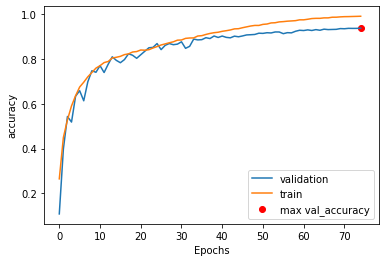

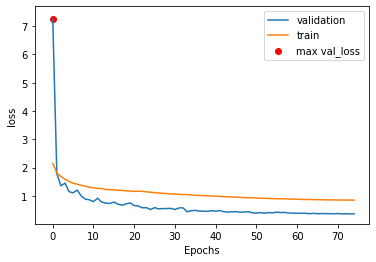

0.0716 in 151.0 min



In [16]:

score = fitness_cnn.calc(net, test=False, precise_mode=True)

In [17]:
1 - 0.9375290000000001

0.06247099999999994